<a href="https://colab.research.google.com/github/Lucas-Buk/Machine-Learning-Metodos-Prob/blob/main/Aula_05_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bibliotecas e instalações**

In [1]:
# bibliotecas gerais

import numpy as np
import pandas as pd
import matplotlib as plt
import csv
import matplotlib.pyplot as plt 
from matplotlib import pyplot
import math

# Específicos

## Codificadores

from sklearn.preprocessing import LabelEncoder

## Árvore

from sklearn.tree import DecisionTreeClassifier

## Seleção de modelos

from sklearn.model_selection import train_test_split, KFold, cross_val_score

### Parte gráfica

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

####### Específicos para visualização #######

from pandas.plotting import scatter_matrix
from matplotlib import cm


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
# Feature selection

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# Feature selection

from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [4]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

# **Funções proprietárias**

## **Manipulação de dados**

In [5]:
# Considerando um cojunto de dados onde a última coluna representa o resultado
# Sugestão: deixar as dimenSões configuráveis.
# Estar atento a verificação dimensional para evitar erro.

def CarregaDados(Arquivo):
  dados   =  pd.read_csv(Arquivo, header = False)
  dataset =  dados.values
  col     =  dados.columns

  X       =  dataset[:,:-1]
  y       =  dataset[:,-1]

  return X, y, col

## **Árvore: entropia**

$ \large H = -\sum_{n=1}^N p_n \log_2(p_n)$

In [6]:
def entropia(NE,NS):
    P = NE/NS;
    H = -P*np.log2(P)-(1-P)*np.log2((1-P))
    return H;

## **Feature selection**

In [7]:
def select_features(X_train, y_train, X_test):
	
  # seleciona um conjunto de K melhores features
  # utilizando o critério de ganho de informação

	fs = SelectKBest(score_func=mutual_info_classif, k=4)
 
	# aprende com os dados

	fs.fit(X_train, y_train)
 
	# Aplica a transformaÇão aos dados de treino

	X_train_fs = fs.transform(X_train)
 
	# Aplica a transformação aos dados de teste

	X_test_fs = fs.transform(X_test)
 
	return X_train_fs, X_test_fs, fs

## **Avalia o modelo**

In [8]:
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# **Árvore: conceitos fundamentais**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


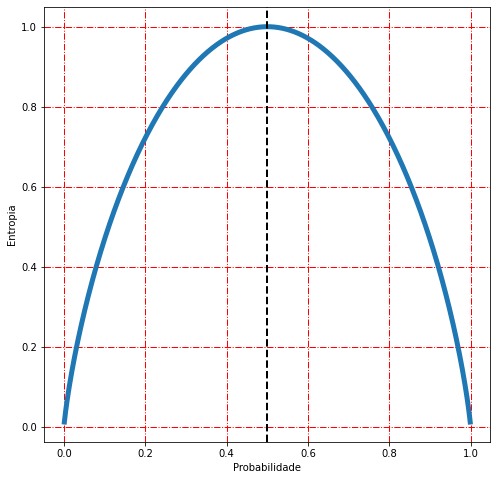

In [9]:
NE = np.linspace(0,100,1000)
NS = 100

plt.figure(figsize=(8,8))
plt.plot(NE/NS,entropia(NE,NS),lw=5)
plt.grid(color='r', linestyle='-.', linewidth=1)
plt.axvline(x=0.5, color='k', linewidth=2.0, linestyle='--') 
plt.xlabel('Probabilidade')
plt.ylabel('Entropia')

plt.show()

## **Dados**

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
dfCat = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pós/ML MP/Datasets/ID3.csv', delimiter = ";")
dfCat.sample(5)

,Day,Outlook,Temp.,Humidity,Wind,Decision
8,9,Sunny,Cool,Normal,Weak,Yes
2,3,Overcast,Hot,High,Weak,Yes
3,4,Rain,Mild,High,Weak,Yes
0,1,Sunny,Hot,High,Weak,No
11,12,Overcast,Mild,High,Strong,Yes


In [12]:
col = dfCat.columns
col

Index(['Day', 'Outlook', 'Temp.', 'Humidity', 'Wind', 'Decision'], dtype='object')

In [13]:
colunas = ['Outlook', 'Temp.', 'Humidity', 'Wind', 'Decision']

In [14]:
  Codificadores = []

  for i in range(len(colunas)):
    encoder = LabelEncoder()
    encoder.fit(dfCat[colunas[i]])
    ColunaCodificada = encoder.transform(dfCat[colunas[i]])
    dfCat[colunas[i]] = ColunaCodificada
    Codificadores.append(encoder)

    ####### Alternativa #######

  # mapper = DataFrameMapper(
  # [(continuous_col, StandardScaler()) for continuous_col in continuous_cols] +
  # [(categorical_col, LabelBinarizer()) for categorical_col in categorical_cols]
  # )
  # pipeline = Pipeline(
  # [("mapper", mapper),
  # ("estimator", estimator)]
  # )
  # pipeline.fit_transform(df, df["y"])

In [15]:
Codificadores

[LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder()]

In [16]:
Codificadores[0].classes_

array(['Overcast', 'Rain', 'Sunny'], dtype=object)

In [17]:
Codificadores[3].inverse_transform([0,1])

array(['Strong', 'Weak'], dtype=object)

In [18]:
dfCat.head()

,Day,Outlook,Temp.,Humidity,Wind,Decision
0,1,2,1,0,1,0
1,2,2,1,0,0,0
2,3,0,1,0,1,1
3,4,1,2,0,1,1
4,5,1,0,1,1,1


## **Treinamento e visualização da árvore**

In [19]:
feature_cols = ['Outlook','Temp.','Humidity','Wind']
X = dfCat.iloc[:,1:5].values
y = dfCat.iloc[:,5].values

In [20]:
classificador = DecisionTreeClassifier(criterion = "entropy", min_samples_split=2,max_depth=4)
classificador = classificador.fit(X,y)

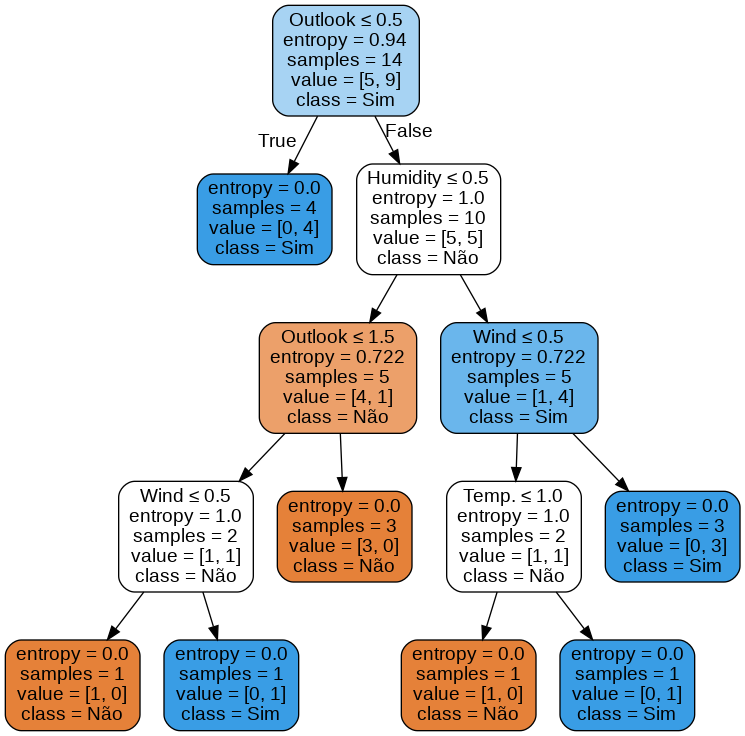

In [21]:
dot_data = StringIO()
export_graphviz(classificador, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Não','Sim'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [22]:
dfCat.head(14)

,Day,Outlook,Temp.,Humidity,Wind,Decision
0,1,2,1,0,1,0
1,2,2,1,0,0,0
2,3,0,1,0,1,1
3,4,1,2,0,1,1
4,5,1,0,1,1,1
5,6,1,0,1,0,0
6,7,0,0,1,0,1
7,8,2,2,0,1,0
8,9,2,0,1,1,1
9,10,1,2,1,1,1


In [23]:
dfCat['Decision'][dfCat['Outlook']=='Overcast']

Series([], Name: Decision, dtype: int64)

# **Dados Diabetes**

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

In [25]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-integer

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pós/ML MP/Datasets/diabetes.csv', delimiter=',')

In [26]:
X = df.iloc[:-1,:-1]
X.head()
y = df.iloc[:-1,8]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Diag, dtype: int64

In [27]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=50)

## **Normalização dos dados**

In [28]:
Xn = StandardScaler().fit_transform(X_treino)

# **Feature selection**

## **Auto vetores e auto valores**

https://github.com/bhattbhavesh91/pca-from-scratch-iris-dataset/blob/master/eigen_transformation_notebook.ipynb

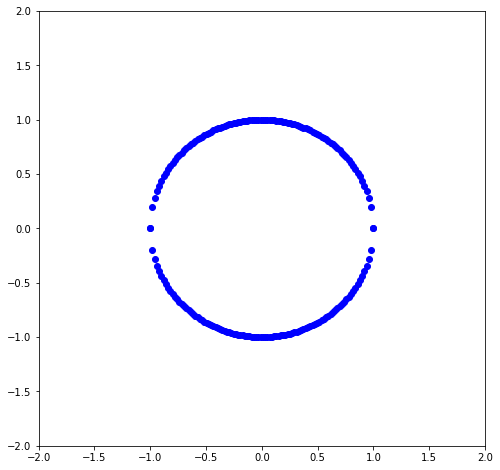

In [29]:
####### Importante para que a explicação Não seja distorcida pelo formato do plot

from pylab import rcParams
rcParams['figure.figsize'] = 8,8

################################################################################

####### dados artificiais em formato de círculo

x1 = np.linspace(-1,1,100)
y1 = np.sqrt(1 - np.square(x1))
y2 = -1 * y1

####### Visualização

plt.plot(x1,y1, 'bo')
plt.plot(x1,y2, 'bo')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

In [30]:
####### Matriz de transformação

M = np.array([[2, 1],[1,1]])
M

array([[2, 1],
       [1, 1]])

In [31]:
####### Transformação

def transformaDados(x,y,M):
    return M[0,0]*x + M[0,1]*y, M[1,0]*x + M[1,1]*y

In [32]:
####### Aplica a transformação

x_n1, y_n1 = transformaDados(x1,y1,M)
x_n2, y_n2 = transformaDados(x1,y2,M)

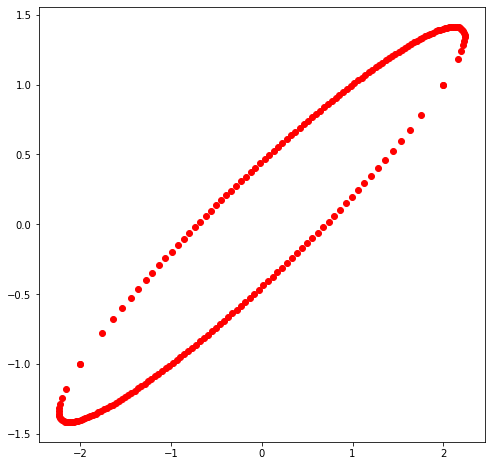

In [34]:
####### Visualiza a transformação

plt.plot(x_n1,y_n1, 'ro')
plt.plot(x_n2,y_n2, 'ro')
plt.show()

In [35]:
####### Auto valores e autovetores da matriz M

eig_vals, eig_vecs = np.linalg.eig(M)
print('Auto vetores \n%s' %eig_vecs)
print('\nAuto valores \n%s' %eig_vals)

Auto vetores 
[[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]

Auto valores 
[2.61803399 0.38196601]


### **Dados originais e os respectivos auto vetores**

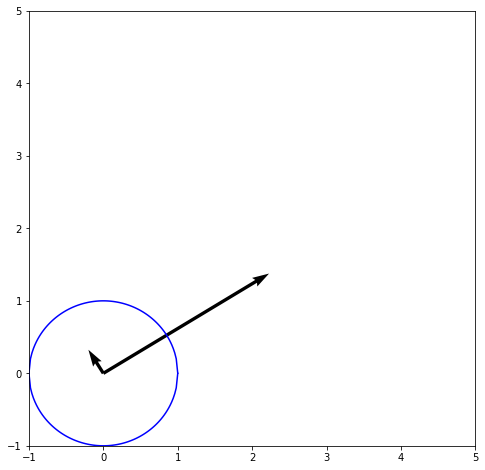

In [36]:
####### Visualiza os auto valores e auto vetores juntamente com os dados

soa = np.array([[0, 0, 
                 eig_vals[0] * eig_vecs[0][0], 
                 eig_vals[0] * eig_vecs[1][0]]])

soa1 = np.array([[0, 0, 
                  eig_vals[1] * eig_vecs[0][1], 
                  eig_vals[1] * eig_vecs[1][1]]])

X, Y, U, V = zip(*soa)
X1, Y1, U1, V1 = zip(*soa1)

plt.plot(x1,y1, 'b')
plt.plot(x1,y2, 'b')
plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
plt.quiver(X1, Y1, U1, V1, angles='xy', scale_units='xy', scale=1)
plt.xlim([-1, 5])
plt.ylim([-1, 5])
plt.show()

### **Dados transformados e os respectivos auto vetores**

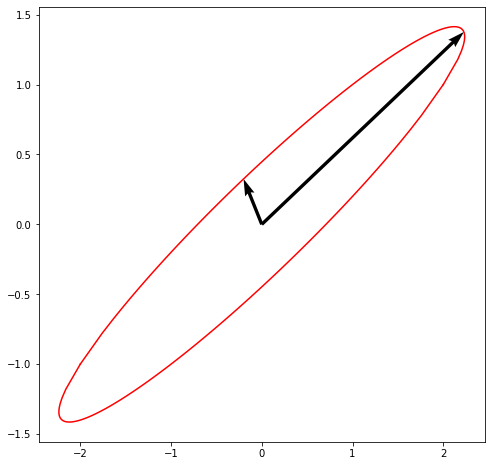

In [37]:
soa = np.array([[0, 0, 
                 eig_vals[0] * eig_vecs[0][0], 
                 eig_vals[0] * eig_vecs[1][0]]])

soa1 = np.array([[0, 0, 
                  eig_vals[1] * eig_vecs[0][1], 
                  eig_vals[1] * eig_vecs[1][1]]])

X, Y, U, V = zip(*soa)
X1, Y1, U1, V1 = zip(*soa1)
plt.plot(x_n1,y_n1, 'r')
plt.plot(x_n2,y_n2, 'r')
plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
plt.quiver(X1, Y1, U1, V1, angles='xy', scale_units='xy', scale=1)
plt.draw()
plt.show()

## **PCA**

In [38]:
pca = PCA( )
principalComponents = pca.fit_transform(Xn)

In [39]:
pca.explained_variance_ratio_

array([0.254246  , 0.22047459, 0.13021158, 0.11112427, 0.09635277,
       0.08705191, 0.05164143, 0.04889745])

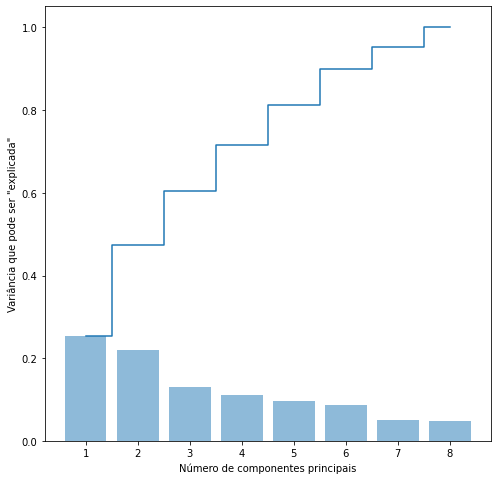

In [40]:
plt.figure(figsize=(8,8))

plt.bar(range(1,9), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1,9), np.cumsum(pca.explained_variance_ratio_), where='mid')

plt.ylabel('Variância que pode ser "explicada"')
plt.xlabel('Número de componentes principais')


plt.show()

In [41]:
pca = PCA(0.5, whiten=True)
principalComponents = pca.fit_transform(Xn)
principalComponents.shape

(613, 3)

In [42]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(Xn)
PCAdf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

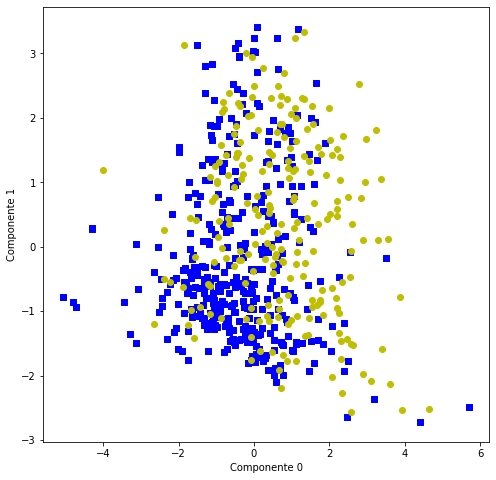

In [43]:
colors = ['b', 'y']
markers = ['s', 'o']

plt.figure(figsize=(8,8))

for l, c, m in zip(np.unique(y_treino), colors, markers):
    plt.scatter(principalComponents[y_treino == l, 0], 
                principalComponents[y_treino == l, 1], 
                c=c, label=l, marker=m)
    
plt.xlabel('Componente 0')
plt.ylabel('Componente 1')

plt.show()

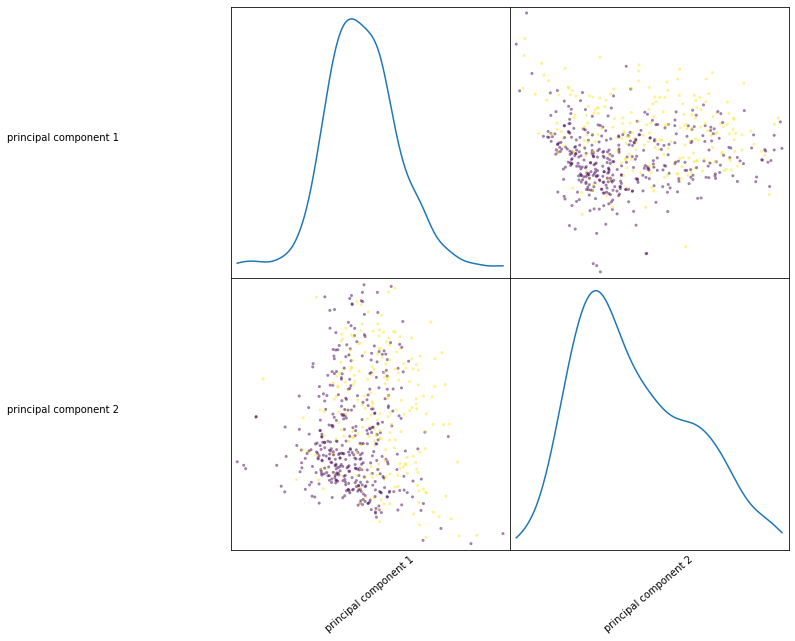

In [44]:
cmap = cm.get_cmap('viridis')

sm = scatter_matrix(PCAdf, figsize=(10, 10), diagonal='kde',c=y_treino, cmap=cmap)

# Modifica o ângulo do label
[s.xaxis.label.set_rotation(40) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

# Ajusta o offset para não sopbrepor
[s.get_yaxis().set_label_coords(-0.6,0.5) for s in sm.reshape(-1)]

# Não mostra os "ticks"
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

## **Visualizando um classificador e suas regiões**

http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/#example-8-grid-of-decision-region-slices

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


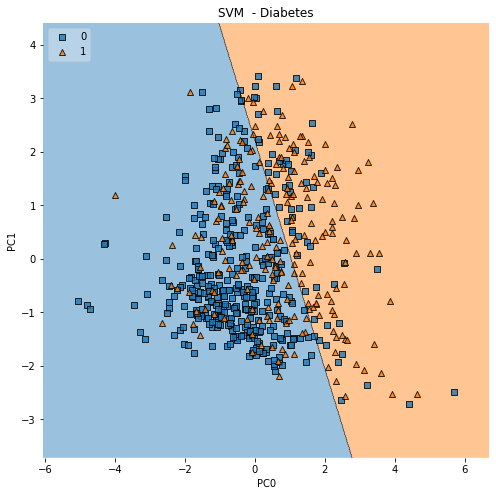

In [45]:
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC

# Treinamento

svm = SVC(C=0.5, kernel='linear')
svm.fit(np.array(principalComponents), y_treino)


# A separabilidade do algoritmo

plot_decision_regions(np.array(principalComponents), np.array(y_treino), clf=svm, legend=2)

# Gráfico de resultados

plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('SVM  - Diabetes')
plt.show()

In [46]:
# Seleciona as features

X_treino_fs, X_teste_fs, fs = select_features(X_treino, y_treino, X_teste)

# Ajusta o modelo com as features selecionadas

model = LogisticRegression(solver='liblinear')
model.fit(X_treino_fs, y_treino)

# Aplicação do modelo aos dados de teste

yhat = model.predict(X_teste_fs)

# Avalia o resultado da prediÇão

accuracy = accuracy_score(y_teste, yhat)

print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 70.13


In [53]:
X_treino_fs.shape

(613, 4)

>1 0.756 (0.046)
>2 0.769 (0.044)
>3 0.766 (0.037)
>4 0.767 (0.036)


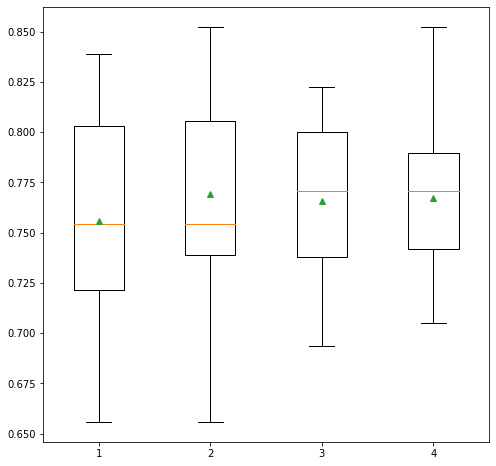

In [54]:
# Número de features que serão avaliadas

num_features = [i+1 for i in range(X_treino_fs.shape[1])]

# Cria diversos cenários de avaliação variando k

results = list()

for k in num_features:
	model = LogisticRegression(solver='liblinear')
	fs = SelectKBest(score_func=f_classif, k=k)
	pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
 
	# Avalia o modelo

	scores = evaluate_model(pipeline, X_treino_fs, y_treino)
	results.append(scores)
 
	# Resultados

	print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))
 
# Boxplot comprativo dos modelos

pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()

# **Random Forest**

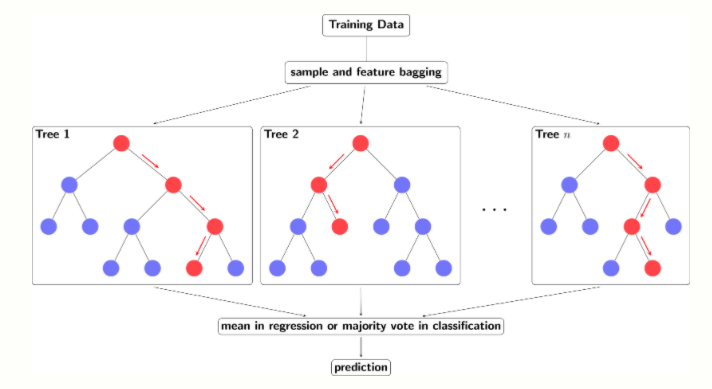

## **Hyperparameter**

**n_estimators hyperparameter:** número de árvores utilizadas na predição.

**max_features:** número máximo de "features" que são consideradas para "split" de um nó.

**min_sample_leaf:** número mínimo de "leafs" necessárias para "split" de um nó.

**random_state:** permite que a saída do modelo seja idêntica toda vez que ele é executado, desde que o valor seja o mesmo.

**oob_score:** é o método de validação cruzada utilziado no random forest.

In [57]:
# Cria o modelo

model = RandomForestClassifier()

# Avalia o modelo

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_treino_fs, y_treino, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# Resultado

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.770 (0.040)


>0.1 0.772 (0.037)
>0.2 0.774 (0.041)
>0.3 0.777 (0.045)
>0.4 0.775 (0.039)
>0.5 0.778 (0.040)
>0.6 0.772 (0.043)
>0.7 0.770 (0.044)
>0.8 0.768 (0.039)
>0.9 0.763 (0.043)
>1.0 0.764 (0.042)


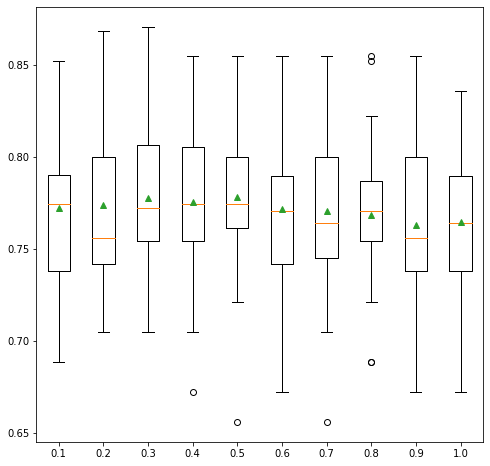

In [60]:
# Cria diversos modelos variando a proporção de amostras para teste

def get_models():

	models = dict()

	for i in np.arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		# None => 100%
		if i == 1.0:
			i = None
		models[key] = RandomForestClassifier(max_samples=i)
	return models
 
########################################################################

models = get_models()

# Varia o modelo e guarda desempenho

results, names = list(), list()
for name, model in models.items():

	scores = evaluate_model(model, X_treino_fs, y_treino)

	results.append(scores)
	names.append(name)
 
	# Resultados numéricos

	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
 
# Boxplot comprativo de cada modelo

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>1 0.757 (0.049)
>2 0.759 (0.051)
>3 0.767 (0.061)
>4 0.766 (0.049)
>5 0.765 (0.051)
>6 0.761 (0.057)
>7 0.760 (0.058)


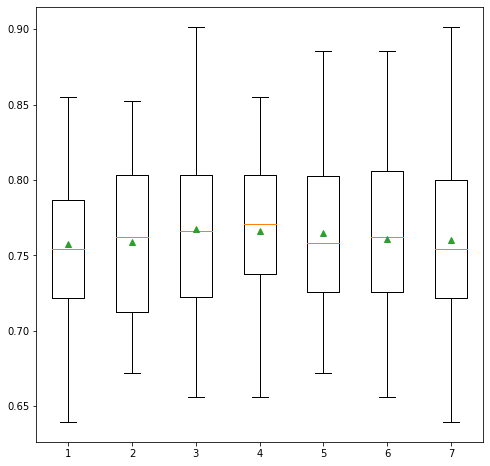

In [62]:
# Cria diversos modelos variando o número de features para "split"

def get_models():

	models = dict()
	
	for i in range(1,8):
		models[str(i)] = RandomForestClassifier(max_features=i)
	return models

	
########################################################################

models = get_models()

# Varia o modelo e guarda desempenho

results, names = list(), list()
for name, model in models.items():

	scores = evaluate_model(model, X_treino, y_treino)

	results.append(scores)
	names.append(name)
 
	# Resultados numéricos

	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
 
# Boxplot comprativo de cada modelo

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>10 0.739 (0.037)
>50 0.770 (0.036)
>100 0.766 (0.039)
>500 0.771 (0.038)
>1000 0.772 (0.034)


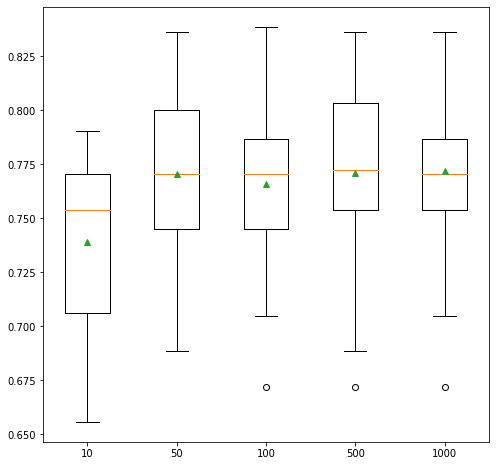

In [63]:
# Cria diversos modelos variando o número de estimadores

def get_models():

	models = dict()
 
	n_trees = [10, 50, 100, 500, 1000]
	
	for n in n_trees:
		models[str(n)] = RandomForestClassifier(n_estimators=n)
	return models
 
########################################################################

models = get_models()

# Varia o modelo e guarda desempenho

results, names = list(), list()
for name, model in models.items():

	scores = evaluate_model(model, X_treino_fs, y_treino)

	results.append(scores)
	names.append(name)
 
	# Resultados numéricos

	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
 
# Boxplot comprativo de cada modelo

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>1 0.750 (0.033)
>2 0.770 (0.041)
>3 0.775 (0.034)
>4 0.781 (0.037)
>5 0.781 (0.040)
>6 0.777 (0.043)
>7 0.767 (0.044)
>None 0.758 (0.047)


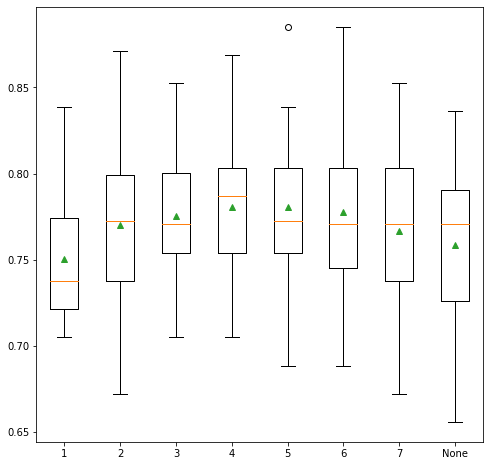

In [64]:
# Cria diversos modelos variando o número de "splits"

def get_models():

	models = dict()
 
	depths = [i for i in range(1,8)] + [None]
  # None => máximo
	
	for n in depths:
		models[str(n)] = RandomForestClassifier(max_depth=n)
	return models

########################################################################

models = get_models()

# Varia o modelo e guarda desempenho

results, names = list(), list()
for name, model in models.items():

	scores = evaluate_model(model, X_treino_fs, y_treino)

	results.append(scores)
	names.append(name)
 
	# Resultados numéricos

	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
 
# Boxplot comprativo de cada modelo

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# **Referências**

In [ ]:
########################################################################################################
# Code source: https://builtin.com/data-science/random-forest-algorithm                                #
#                                                                                                      #
# Modified for class use and explanation about random Forest by V.C.Parro                              #
#                                                                                                      #
# Data base: Diabetes data base                                                                        #
# License: BSD 3 clause                                                                                #
#                                                                                                      #
########################################################################################################

https://machinelearningmastery.com/feature-selection-with-numerical-input-data/

https://machinelearningmastery.com/implement-random-forest-scratch-python/

https://machinelearningmastery.com/random-forest-ensemble-in-python/

https://machinelearningmastery.com/bagging-and-random-forest-ensemble-algorithms-for-machine-learning/

https://machinelearningmastery.com/bagging-and-random-forest-for-imbalanced-classification/

https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/

https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-5-advanced-topics-pipelines-statistical-model-comparison-and-model-deployment/

https://builtin.com/data-science/random-forest-algorithm

https://www.kaggle.com/niklasdonges/end-to-end-project-with-python/log

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

https://scikit-learn.org/stable/modules/cross_validation.html



https://towardsdatascience.com/pca-is-not-feature-selection-3344fb764ae6

https://towardsdatascience.com/feature-selection-and-dimensionality-reduction-f488d1a035de

https://machinelearningmastery.com/feature-selection-machine-learning-python/